In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

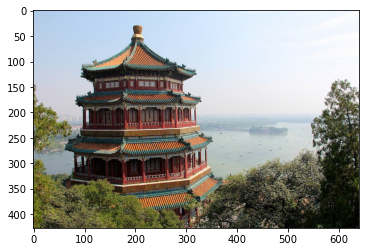

In [58]:
Raw_image = load_sample_image('china.jpg')
image = Raw_image/255 # 255로 나누는 이유는 변환함수의 입력값 범위가 0~1의 실수형으로 정의했기 때문이다.
plt.imshow(image)

In [59]:
len(image)

427

In [60]:
image.shape

(427, 640, 3)

##### image 행렬은 각각의 pixel(427x640)에서 data 의 형태가 0~255값을 가지는 RGB값(3)으로 표현한다.

In [61]:
X = image.reshape(-1,3)
X

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

##### 데이터를 KMC 분류를 하기 위해서 열벡터로 바꿔준다

In [62]:
kmeans_image = KMeans(n_clusters = 10).fit(X)

In [63]:
segmented_img = kmeans_image.cluster_centers_[kmeans_image.labels_]
print(segmented_img)
print(len(segmented_img))

[[0.7799137  0.84521986 0.92068545]
 [0.7799137  0.84521986 0.92068545]
 [0.7799137  0.84521986 0.92068545]
 ...
 [0.17974662 0.15647278 0.11797435]
 [0.06563581 0.05938565 0.03557004]
 [0.06563581 0.05938565 0.03557004]]
273280


##### KMC를 통해 10가지 색상으로 분류하였다. 결과인 segmented_img는 열벡터로 표현되어있다.

In [64]:
segmented_img = segmented_img.reshape(image.shape)

##### 열벡터인 segmented_img를 이미지화 하기 위해서 image의 형태(427,640,3)로 바꿔주었다.

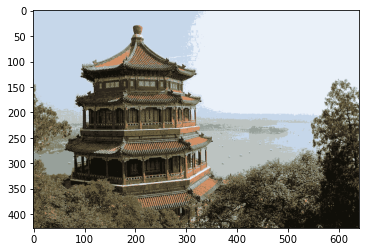

In [65]:
plt.imshow(segmented_img)

## 결론 및 주의점

#### 결론 
KMC를 통해서 [255,255,255] RGB형태로 표현되어있는 image 데이터를 색상별로 분류할 수 있다. \
이 때 n_clusters은 clusters의 중심점의 갯수를 나타내며, image의 경우 분류할 색상의 갯수에 해당한다. 


#### 주의점
* input 데이터의 입력함수 범위는 0~1로 표현되어야 한다. 따라서 RGB값의 경우 255로 나누는 과정이 필수적이다. 
* data의 input 형태에 대해서 고려해야 한다. 전체 데이터를 1차원 형태로 나열한 후, 다시 원래 형태로 되돌리는 과정을 통해서 분류한다.